# Phase 2 project
    
# Effects of Renovations on House Price

We are advising a real estate agency tasked to help potential home sellers decide what renovations to make for increasing their home value. First priority is to find the most highly correlated numerical features that can be changed to increase home value. Second priority is to find what categorical features that can be changed to increase home value. Third priority is to correct models assumptions.


## Import Libraries and Inspect Dada

In [8]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from random import sample
from itertools import combinations
from statsmodels.stats.power import TTestIndPower, TTestPower
import math
import seaborn as sns
import scipy as sp
import pandas as pd
from matplotlib.lines import Line2D
import random
import statsmodels.api as sm
from itertools import combinations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.stattools import jarque_bera

import num_model_all_combos as simple_test

In [9]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [10]:
# checking original df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [11]:
df.shape

(30155, 25)

In [12]:
# checking for nulls
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [13]:
# dropping nulls
df.dropna(inplace=True)

In [14]:
# confirming nulls dropped
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

### Checking each features and decide to drop some outliers in price to within 3 standard deviations

Only losing .6 percent of data

C:\Users\Chiafeng\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


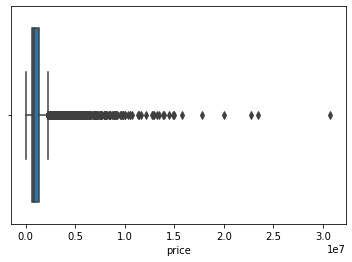

In [15]:
sns.boxplot(df['price']);

In [16]:
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) & (df['price'] < np.percentile(df['price'], 99.7))]

In [17]:
lower_price_point = df.loc[df['price'] == np.percentile(df['price'], .3)]['price']
upper_price_point = df.loc[df['price'] == np.percentile(df['price'], 99.7)]['price']

print(lower_price_point, upper_price_point)

Series([], Name: price, dtype: float64) 3059     7000000.0
4454     7000000.0
4455     7000000.0
12564    7000000.0
29947    7000000.0
Name: price, dtype: float64


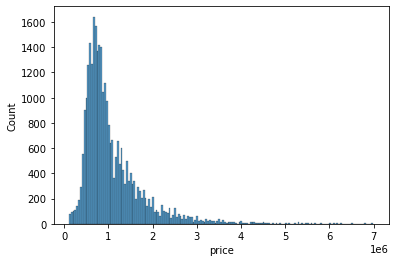

In [18]:
sns.histplot(df_no_outliers['price']);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [20]:
df_no_outliers.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.655892
sqft_above       0.583745
bathrooms        0.517427
bedrooms         0.337179
sqft_patio       0.309581
sqft_garage      0.296795
sqft_basement    0.238018
floors           0.205952
yr_built         0.106209
sqft_lot         0.096905
yr_renovated     0.085222
lat              0.080874
long            -0.033954
id              -0.035254
Name: price, dtype: float64

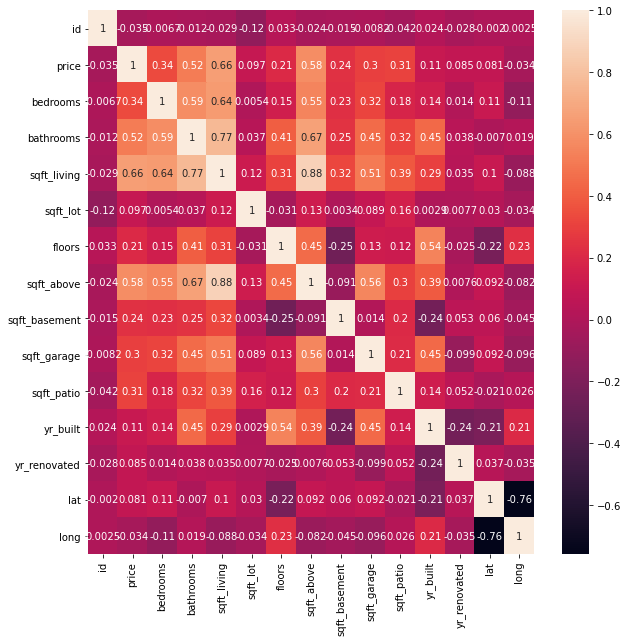

In [26]:
# Checking for Multicollinearity
fig = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_no_outliers.corr(), annot=True);

#### Creating a new DF that now has features dropped (after dropping outliers in price)
These columns are not relevant for a variety of reasons listed above

# TESTING ALL MODELS

In [14]:
df_dropped_t = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'date'], axis = 1)

In [37]:
df_dropped_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   sqft_lot       29927 non-null  int64  
 5   floors         29927 non-null  float64
 6   waterfront     29927 non-null  int64  
 7   greenbelt      29927 non-null  int64  
 8   nuisance       29927 non-null  int64  
 9   view           29927 non-null  int64  
 10  condition      29927 non-null  int64  
 11  grade          29927 non-null  int64  
 12  heat_source    29927 non-null  int64  
 13  sewer_system   29927 non-null  int64  
 14  sqft_above     29927 non-null  int64  
 15  sqft_basement  29927 non-null  int64  
 16  sqft_garage    29927 non-null  int64  
 17  sqft_patio     29927 non-null  int64  
 18  yr_bui

In [45]:
df_dropped_t['condition'].value_counts()

3    18385
4     8017
5     3242
2      224
1       59
Name: condition, dtype: int64

In [35]:
df_dropped_t['greenbelt'].replace({"NO":0, "YES":1}, inplace=True)

In [17]:
df_dropped_t['waterfront'].replace({"NO":0, "YES":1}, inplace=True)

In [18]:
df_dropped_t['view'].replace({"EXCELLENT":5, "GOOD":4 , "AVERAGE":3, "FAIR": 2, "NONE":1}, inplace=True)

In [20]:
df_dropped_t['condition'].replace({"Very Good":5, "Good":4 , "Average":3, "Fair": 2, "Poor":1}, inplace=True)

In [23]:
df_dropped_t['nuisance'].replace({"NO":0, "YES":1}, inplace=True)

In [24]:
df_dropped_t['grade'].replace({"7 Average":7, "8 Good":8 , "9 Better":9,
                             "6 Low Average": 6, "10 Very Good":10,
                            "5 Fair":5, "11 Excellent":11, "12 Luxury":12,
                            "4 Low":4, "13 Mansion":13, "3 Poor":3, "2 Substandard":2},
                            inplace=True)

In [27]:
df_dropped_t['heat_source'].replace({"Gas":7, "Electricity":6 , "Oil":5, "Gas/Solar": 4, "Electricity/Solar":3,
                                    "Other":2, "Oil/Solar":1 }, inplace=True)

In [30]:
df_dropped_t['sewer_system'].replace({"PUBLIC":4 , "PRIVATE":3, "PRIVATE RESTRICTED": 2,
                                      "PUBLIC RESTRICTED":1}, inplace=True)

In [49]:
df_dum_cond = pd.get_dummies(df_dropped_t, columns=['condition', 'nuisance', 'grade', 'greenbelt',
                                                   'waterfront', 'view', 'heat_source', 'sewer_system'],
                             drop_first=True)
df_dum_cond.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'nuisance_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'greenbelt_1', 'waterfront_1', 'view_2', 'view_3', 'view_4',
       'view_5', 'heat_source_2', 'heat_source_3', 'heat_source_4',
       'heat_source_5', 'heat_source_6', 'heat_source_7', 'sewer_system_2',
       'sewer_system_3', 'sewer_system_4'],
      dtype='object')

# Model: "price" and "condition" only

In [50]:

X = df_dum_cond[['condition_2', 'condition_3', 'condition_4', 'condition_5']]
y = df_dum_cond[['price']]

price_cond_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
price_cond_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     25.22
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           6.89e-21
Time:                        10:27:10   Log-Likelihood:            -4.4605e+05
No. Observations:               29927   AIC:                         8.921e+05
Df Residuals:                   29922   BIC:                         8.921e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.025e+05   9.36e+04      7.505      0.000    5.19e+05    8.86e+05
condition_2  9.304e+04   1.05e+05      0.884      0.377   -1.13e+05    2.99e+05
condition_3  4.016e+05   9.38e+04      4.284      0.000    2.18e+05    5.85e+05
condition_4  3.382e+05    9.4e+04      3.600      0.000    1.54e+05    5.22e+05
condition_5  4.094e+05   9.45e+04      4.334      0.000    2.24e+05    5.95e+05
==============================================================================
Omnibus:                    17037.766   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168272.329
Skew:                           2.605   Prob(JB):                         0.00
Kurtosis:                      13.383   Cond. No.                         62.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model: "price" and every features

In [27]:
# Dropping columns that seem to have little effect
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_renovated',
                                  'date', 'waterfront', 'greenbelt', 'view'], axis = 1)

In [53]:
X = df_dum_cond.drop(['price'], axis=1)
y = df_dum_cond[['price']]

price_all_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
price_all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     958.0
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:36:56   Log-Likelihood:            -4.3334e+05
No. Observations:               29927   AIC:                         8.668e+05
Df Residuals:                   29884   BIC:                         8.671e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.485e+06   6.55e+05      9.906      0.000     5.2e+06    7.77e+06
bedrooms       -3.974e+04   3976.717     -9.994      0.000   -4.75e+04   -3.19e+04
bathrooms       8.531e+04   5680.344     15.019      0.000    7.42e+04    9.64e+04
sqft_living      124.2382     13.133      9.460      0.000      98.497     149.979
sqft_lot           0.3393      0.050      6.849      0.000       0.242       0.436
floors         -4.569e+04   7045.190     -6.485      0.000   -5.95e+04   -3.19e+04
sqft_above       157.0154     13.381     11.734      0.000     130.788     183.242
sqft_basement     83.1806      9.914      8.390      0.000      63.749     102.613
sqft_garage     -124.6382     13.606     -9.160      0.000    -151.307     -97.969
sqft_patio        59.9792     12.879      4.657      0.000      34.736      85.222
yr_built       -3145.9834    142.940    -22.009      0.000   -3426.151   -2865.816
yr_renovated      43.4394      7.178      6.052      0.000      29.371      57.508
condition_2     2.964e+04   7.09e+04      0.418      0.676   -1.09e+05    1.69e+05
condition_3     7.888e+04   6.43e+04      1.227      0.220   -4.71e+04    2.05e+05
condition_4     1.194e+05   6.43e+04      1.856      0.064   -6717.473    2.46e+05
condition_5      1.79e+05   6.47e+04      2.767      0.006    5.22e+04    3.06e+05
nuisance_1      4.083e+04   7341.344      5.562      0.000    2.64e+04    5.52e+04
grade_3        -2.693e+05      5e+05     -0.539      0.590   -1.25e+06    7.11e+05
grade_4        -1.739e+05   4.79e+05     -0.363      0.717   -1.11e+06    7.66e+05
grade_5        -2.269e+05   4.75e+05     -0.477      0.633   -1.16e+06    7.05e+05
grade_6        -2.357e+05   4.75e+05     -0.496      0.620   -1.17e+06    6.95e+05
grade_7        -1.343e+05   4.75e+05     -0.283      0.777   -1.07e+06    7.97e+05
grade_8         4.704e+04   4.75e+05      0.099      0.921   -8.84e+05    9.78e+05
grade_9         3.931e+05   4.75e+05      0.827      0.408   -5.38e+05    1.32e+06
grade_10         8.51e+05   4.75e+05      1.790      0.073   -8.07e+04    1.78e+06
grade_11        1.378e+06   4.76e+05      2.895      0.004    4.45e+05    2.31e+06
grade_12        1.708e+06   4.78e+05      3.576      0.000    7.72e+05    2.64e+06
grade_13        1.865e+06   4.95e+05      3.767      0.000    8.94e+05    2.83e+06
greenbelt_1     4.301e+04   1.75e+04      2.464      0.014    8794.246    7.72e+04
waterfront_1    3.574e+05   2.59e+04     13.797      0.000    3.07e+05    4.08e+05
view_2          1.606e+05   3.24e+04      4.951      0.000     9.7e+04    2.24e+05
view_3          5.685e+04   1.16e+04      4.880      0.000     3.4e+04    7.97e+04
view_4          7.974e+04    1.7e+04      4.688      0.000    4.64e+04    1.13e+05
view_5          4.642e+05    2.5e+04     18.587      0.000    4.15e+05    5.13e+05
heat_source_

# Model: highest .corr() to price

In [52]:
# Dropping columns that seem to have little effect
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_renovated',
                                  'date', 'waterfront', 'greenbelt', 'view'], axis = 1)

In [53]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   sqft_lot       29927 non-null  int64  
 5   floors         29927 non-null  float64
 6   nuisance       29927 non-null  object 
 7   condition      29927 non-null  object 
 8   grade          29927 non-null  object 
 9   heat_source    29927 non-null  object 
 10  sewer_system   29927 non-null  object 
 11  sqft_above     29927 non-null  int64  
 12  sqft_basement  29927 non-null  int64  
 13  sqft_garage    29927 non-null  int64  
 14  sqft_patio     29927 non-null  int64  
 15  yr_built       29927 non-null  int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 3.9+ MB


In [ ]:
df_dropped['nuisance'].value_counts()

In [ ]:
df_dropped['grade'].value_counts()

In [ ]:
df_dropped['condition'].value_counts()

In [ ]:
# df_dropped['sewer_system'].value_counts()

In [ ]:
# df_dropped['heat_source'].sort_values().values

#### Jasmie's model dropping more features:
- yr_built, sewer_system, heat_source, sqft_lot

In [54]:
df_dropped = df_dropped.drop(['sqft_lot', 'yr_built', 'sewer_system', 'heat_source'], axis = 1)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   nuisance       29927 non-null  object 
 6   condition      29927 non-null  object 
 7   grade          29927 non-null  object 
 8   sqft_above     29927 non-null  int64  
 9   sqft_basement  29927 non-null  int64  
 10  sqft_garage    29927 non-null  int64  
 11  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [55]:
df_numerical = df_dropped.select_dtypes('number')
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   sqft_above     29927 non-null  int64  
 6   sqft_basement  29927 non-null  int64  
 7   sqft_garage    29927 non-null  int64  
 8   sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.3 MB


In [56]:
df_dropped.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.655892
sqft_above       0.583745
bathrooms        0.517427
bedrooms         0.337179
sqft_patio       0.309581
sqft_garage      0.296795
sqft_basement    0.238018
floors           0.205952
Name: price, dtype: float64

In [58]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   nuisance       29927 non-null  object 
 6   condition      29927 non-null  object 
 7   grade          29927 non-null  object 
 8   sqft_above     29927 non-null  int64  
 9   sqft_basement  29927 non-null  int64  
 10  sqft_garage    29927 non-null  int64  
 11  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [59]:
# creating baseline model based on highest .corr() to price (ran above)
X = df_dropped[['sqft_living', 'bathrooms', 'bedrooms', 'sqft_patio', 'sqft_basement', 'floors', 'sqft_garage']]
y = df_dropped[['price']]

baseline_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3488.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:02:45   Log-Likelihood:            -4.3717e+05
No. Observations:               29927   AIC:                         8.744e+05
Df Residuals:                   29919   BIC:                         8.744e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.294e+05   1.38e+04     16.661      0.000    2.02e+05    2.56e+05
sqft_living     530.4376      6.047     87.721      0.000     518.585     542.290
bathrooms      6.704e+04   5997.291     11.178      0.000    5.53e+04    7.88e+04
bedrooms       -1.12e+05   4264.800    -26.262      0.000    -1.2e+05   -1.04e+05
sqft_patio      148.9493     14.016     10.627      0.000     121.477     176.421
sqft_basement    20.1101      6.456      3.115      0.002       7.457      32.764
floors         -1.84e+04   6667.759     -2.760      0.006   -3.15e+04   -5331.525
sqft_garage    -146.7862     13.131    -11.178      0.000    -172.524    -121.048
==============================================================================
Omnibus:                    14673.613   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197789.863
Skew:                           2.025   Prob(JB):                         0.00
Kurtosis:                      14.925   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Replce String to number

- for condition:
    - 1. Poor
    - 2. Fair
    - 3. Average
    - 4. Good
    - 5. Excellent

- for nuisance: 1. YES; 0. NO

### Droping condtion >= average

#### Not much improve 

df_dropped_t = df_dropped

df_dropped_t.drop(df_dropped_t[df_dropped_t['condition']=='Good'].index, inplace=True)
df_dropped_t.drop(df_dropped_t[df_dropped_t['condition']=='Very Good'].index, inplace=True)
                              


In [60]:
df_dropped['condition'].value_counts()

Average      18385
Good          8017
Very Good     3242
Fair           224
Poor            59
Name: condition, dtype: int64

In [61]:
df_dropped['condition'].replace({"Very Good":5, "Good":4 , "Average":3, "Fair": 2, "Poor":1}, inplace=True)

In [62]:
df_dropped['nuisance'].replace({"NO":0, "YES":1}, inplace=True)

In [63]:
df_dropped['grade'].replace({"7 Average":7, "8 Good":8 , "9 Better":9,
                             "6 Low Average": 6, "10 Very Good":10,
                            "5 Fair":5, "11 Excellent":11, "12 Luxury":12,
                            "4 Low":4, "13 Mansion":13, "3 Poor":3, "2 Substandard":2},
                            inplace=True)

In [64]:
df_dum = pd.get_dummies(df_dropped, columns=['condition', 'nuisance', 'grade'], drop_first=True)
df_dum.head()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,condition_2,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,675000.0,4,1.0,1180,1.0,1180,0,0,40,0,...,0,0,0,1,0,0,0,0,0,0
1,920000.0,5,2.5,2770,1.0,1570,1570,0,240,0,...,0,0,0,1,0,0,0,0,0,0
2,311000.0,6,2.0,2880,1.0,1580,1580,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,775000.0,3,3.0,2160,2.0,1090,1070,200,270,0,...,0,0,0,0,0,1,0,0,0,0
4,592500.0,2,2.0,1120,2.0,1120,550,550,30,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
X = df_dum.drop(['price','sqft_above', 'sqft_basement'], axis=1)
y = df_dum[['price']]

dummy_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
dummy_model.summary()

# 'condition_2', 'condition_3', 'condition_4', 'condition_5'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1566.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:03:00   Log-Likelihood:            -4.3463e+05
No. Observations:               29927   AIC:                         8.693e+05
Df Residuals:                   29904   BIC:                         8.695e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.238e+05   4.91e+05      0.659      0.510   -6.39e+05    1.29e+06
bedrooms     -3.99e+04   4091.888     -9.751      0.000   -4.79e+04   -3.19e+04
bathrooms    5.537e+04   5559.907      9.958      0.000    4.45e+04    6.63e+04
sqft_living   305.4893      6.260     48.801      0.000     293.220     317.759
floors      -9.247e+04   6219.521    -14.867      0.000   -1.05e+05   -8.03e+04
sqft_garage  -274.0828     12.244    -22.386      0.000    -298.081    -250.085
sqft_patio     67.2602     12.928      5.203      0.000      41.922      92.599
condition_2  2.588e+04   7.38e+04      0.351      0.726   -1.19e+05    1.71e+05
condition_3 -2048.0118   6.69e+04     -0.031      0.976   -1.33e+05    1.29e+05
condition_4  6.066e+04    6.7e+04      0.906      0.365   -7.06e+04    1.92e+05
condition_5  1.251e+05   6.73e+04      1.858      0.063   -6852.890    2.57e+05
nuisance_1   6.068e+04   7597.329      7.986      0.000    4.58e+04    7.56e+04
grade_3      1.307e+05   5.22e+05      0.251      0.802   -8.92e+05    1.15e+06
grade_4      1.723e+05      5e+05      0.344      0.731   -8.08e+05    1.15e+06
grade_5      8.954e+04   4.96e+05      0.181      0.857   -8.83e+05    1.06e+06
grade_6      4.272e+04   4.96e+05      0.086      0.931   -9.29e+05    1.01e+06
grade_7      1.258e+05   4.96e+05      0.254      0.800   -8.46e+05     1.1e+06
grade_8      2.844e+05   4.96e+05      0.574      0.566   -6.87e+05    1.26e+06
grade_9       6.31e+05   4.96e+05      1.273      0.203   -3.41e+05     1.6e+06
grade_10     1.129e+06   4.96e+05      2.277      0.023    1.57e+05     2.1e+06
grade_11     1.702e+06   4.97e+05      3.427      0.001    7.28e+05    2.67e+06
grade_12     2.073e+06   4.98e+05      4.159      0.000     1.1e+06    3.05e+06
grade_13     2.212e+06   5.16e+05      4.283      0.000     1.2e+06    3.22e+06
==============================================================================
Omnibus:                    15640.618   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           271477.493
Skew:                           2.117   Prob(JB):                         0.00
Kurtosis:                      17.134   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

right skewed: price, sqft_living, sqft_above, sqft_patio, 
Some 0 in:
sqft_basement
sqft_garage
sqft_patio

log:price, sqft_living, sqft_above

In [109]:
df_log = df_dum.copy()
df_log['price']=np.log(df_log['price'])
df_log['sqft_living']=np.log(df_log['sqft_living'])
df_log['sqft_above']=np.log(df_log['sqft_above'])

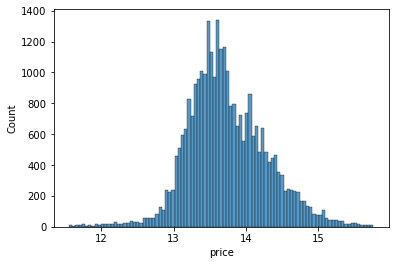

In [110]:
sns.histplot(df_log['price']);

In [111]:

X = df_log.drop(['price','sqft_above'], axis=1)
y = df_log[['price']]

log_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
log_model.summary()

# 'condition_2', 'condition_3', 'condition_4', 'condition_5'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     1235.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:53:24   Log-Likelihood:                -14519.
No. Observations:               29927   AIC:                         2.909e+04
Df Residuals:                   29903   BIC:                         2.929e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.3305      0.399     25.888      0.000       9.548      11.113
bedrooms         -0.0180      0.003     -5.364      0.000      -0.025      -0.011
bathrooms         0.0403      0.004      9.109      0.000       0.032       0.049
sqft_living       0.3917      0.011     36.660      0.000       0.371       0.413
floors           -0.0316      0.005     -5.806      0.000      -0.042      -0.021
sqft_basement  6.732e-05   4.79e-06     14.045      0.000    5.79e-05    7.67e-05
sqft_garage      -0.0002   1.01e-05    -18.475      0.000      -0.000      -0.000
sqft_patio     5.704e-05   1.04e-05      5.494      0.000    3.67e-05    7.74e-05
condition_2       0.0966      0.059      1.634      0.102      -0.019       0.212
condition_3       0.0991      0.054      1.850      0.064      -0.006       0.204
condition_4       0.1589      0.054      2.963      0.003       0.054       0.264
condition_5       0.2260      0.054      4.192      0.000       0.120       0.332
nuisance_1        0.0381      0.006      6.238      0.000       0.026       0.050
grade_3           0.2330      0.418      0.558      0.577      -0.586       1.052
grade_4           0.1527      0.401      0.381      0.703      -0.632       0.938
grade_5           0.0738      0.397      0.186      0.853      -0.705       0.852
grade_6           0.0530      0.397      0.134      0.894      -0.725       0.831
grade_7           0.1848      0.397      0.466      0.642      -0.593       0.963
grade_8           0.3771      0.397      0.950      0.342      -0.401       1.155
grade_9           0.6687      0.397      1.684      0.092      -0.110       1.447
grade_10          0.9531      0.397      2.400      0.016       0.175       1.732
grade_11          1.1754      0.398      2.956      0.003       0.396       1.955
grade_12          1.2895      0.399      3.232      0.001       0.507       2.072
grade_13          1.3604      0.413      3.292      0.001       0.550       2.170
==============================================================================
Omnibus:                     2707.290   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14933.500
Skew:                          -0.257   Prob(JB):                         0.00
Kurtosis:                       6.422   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Try something else out

In [ ]:
# y_scld = np.log(df_dropped['price'])
# y_scld.hist();

In [ ]:
# creating baseline model based on highest .corr() to price (ran above)
X = df_dropped[['sqft_living']]
y = df_dropped['price']
baseline_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
baseline_model.summary()

In [ ]:
# Creating basic cat df based on dtype
df_cat = df_dropped.select_dtypes(object)

In [ ]:
# viewing cat df
df_cat.head()

- Drop ID: just a unique identifier, no helpful info
- Drop lat/long and address. Location not important in this analysis
- Drop year built (not able to change year built)


In [ ]:
df_cat.info()

In [ ]:
# Creating basic numerical df based on dtype
df_numerical = df_dropped.select_dtypes(include=np.number)
df_numerical.head()

In [ ]:
df_numerical.info()

In [ ]:
# pd.plotting.scatter_matrix(df_numerical, figsize = [20,20]);

In [ ]:
# pairpolt
sns.pairplot(df_numerical);

In [ ]:
df_numerical.corr()['price'].sort_values(ascending=False)

In [ ]:
sns.histplot(df_numerical['sqft_living'], kde=True)

In [ ]:
# scale price and sqft_living
y_scld = np.log(df_numerical['price'])

y = y_scld
X = df_numerical['sqft_living']

scld_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
scld_model.summary()

In [ ]:
y_scld = np.log(df_numerical['price'])
y_scld.hist();

In [ ]:
# creating model with all numerical features
#  df_numerical

y = y_scld
X = df_numerical.drop(['price'], axis = 1)

num_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
num_model.summary()

In [ ]:
sns.boxplot(df_numerical['price']);

In [ ]:
def find_outlier_margin(df_feature):
    feature_sort = df_feature.sort_values()
    q1, q3= np.percentile(feature_sort,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    
    return [lower_bound, upper_bound]

In [ ]:
find_outlier_margin(df_numerical['price'])

In [ ]:
# get rid off outliers in price
price_no = df_numerical[df_numerical['price'] < 2276146]
price_no

In [ ]:
sns.boxplot(df_numerical['sqft_living']);

In [ ]:
find_outlier_margin(df_numerical['sqft_living'])

In [ ]:
# get rid off outliers in sqft_living

p_s_no = price_no[price_no['sqft_living'] < 4420]
p_s_no

In [ ]:
sns.boxplot(df_numerical['sqft_above']);

In [ ]:
find_outlier_margin(df_numerical['sqft_above'])

In [ ]:
# get rid off outliers in sqft_above

p_s_s_no = price_no[price_no['sqft_above'] < 3905]
p_s_s_no

In [ ]:
sns.boxplot(df_numerical['bathrooms']);

In [ ]:
find_outlier_margin(df_numerical['bathrooms'])

In [ ]:
# get rid off outliers in bathroom

p_s_s_b_no = price_no[price_no['bathrooms'] < 5]
p_s_s_b_no

In [ ]:
sns.boxplot(df_numerical['sqft_patio']);

In [ ]:
find_outlier_margin(df_numerical['sqft_patio'])

In [ ]:
# get rid off outliers in sqft_patio

p_s_s_b_s_no = price_no[price_no['sqft_patio'] < 740]

In [ ]:
sns.boxplot(p_s_s_b_s_no['bedrooms']);

In [ ]:
find_outlier_margin(df_numerical['bedrooms'])

In [ ]:
# get rid off outliers in bedrooms

p_s_s_b_s_b_no = price_no[(price_no['bedrooms'] < 6)
                       & (price_no['bedrooms'] >= 1)]

In [ ]:
sns.boxplot(p_s_s_b_s_b_no['sqft_garage']);

In [ ]:
find_outlier_margin(df_numerical['sqft_garage'])

In [ ]:
no_outliers = p_s_s_b_s_b_no[p_s_s_b_s_b_no['sqft_garage'] <1275]

In [ ]:
sns.boxplot(no_outliers['sqft_basement']);

In [ ]:
find_outlier_margin(df_numerical['sqft_basement'])

In [ ]:
no_outliers = no_outliers[no_outliers['sqft_basement'] <2350]

In [ ]:
sns.boxplot(no_outliers['floors']);

In [ ]:
find_outlier_margin(df_numerical['floors'])

In [ ]:
no_outliers = no_outliers[no_outliers['floors'] < 4]

In [ ]:
sns.boxplot(no_outliers['sqft_lot']);

In [ ]:
find_outlier_margin(df_numerical['sqft_lot'])

In [ ]:
no_outliers = no_outliers[no_outliers['floors'] < 19145]

In [ ]:
# creating model with 4 numerical features

y = no_outliers['price']
X = no_outliers[['sqft_living', 'sqft_above', 'bathrooms', 'sqft_patio', 'bedrooms']]

num6_model = sm.OLS(y, sm.add_constant(X)).fit()

# viewing the baseline model
num6_model.summary()

In [ ]:
sns.pairplot(no_outliers);

In [ ]:
# Log-scaling can be a good tool to make right-skewed data more normal.
y_scld = np.log()
y_scld.hist();